# Part A

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)
df.isna().sum()
print(df['Attack_type'].value_counts())

Attack_type
Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: count, dtype: int64


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    
encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")

In [5]:
df.to_csv('preprocessed_DNN.csv', encoding='utf-8', index=False)

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('./preprocessed_DNN.csv', low_memory=False) 
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56170.0,2.371681e+09,...,False,False,False,False,True,False,False,True,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430939.0,2.372056e+09,...,False,False,False,False,True,False,False,True,False,False
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,2.025242e+09,...,False,False,False,False,True,False,False,True,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,633917.0,2.372259e+09,...,False,False,False,False,True,False,False,True,False,False
4,0.0,0.0,24099.0,54610.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.0,5.392377e+08,...,False,False,False,False,False,True,False,False,True,False
1909667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,479.0,3.633729e+09,...,False,False,False,False,False,True,False,False,True,False
1909668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,...,False,False,False,False,True,False,False,True,False,False
1909669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,432795.0,2.372057e+09,...,False,False,False,False,True,False,False,True,False,False


In [7]:
df['Attack_type'].value_counts()

Attack_type
Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909671 entries, 0 to 1909670
Data columns (total 97 columns):
 #   Column                                                                                                Dtype  
---  ------                                                                                                -----  
 0   arp.opcode                                                                                            float64
 1   arp.hw.size                                                                                           float64
 2   icmp.checksum                                                                                         float64
 3   icmp.seq_le                                                                                           float64
 4   icmp.unused                                                                                           float64
 5   http.content_length                                                          

In [9]:
feat_cols = list(df.columns)
label_col = "Attack_type"

feat_cols.remove(label_col)
#feat_cols

In [10]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [11]:
skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]

In [12]:
df[skip_list[3]].value_counts()

mqtt.msg_decoded_as
0.0    1909671
Name: count, dtype: int64

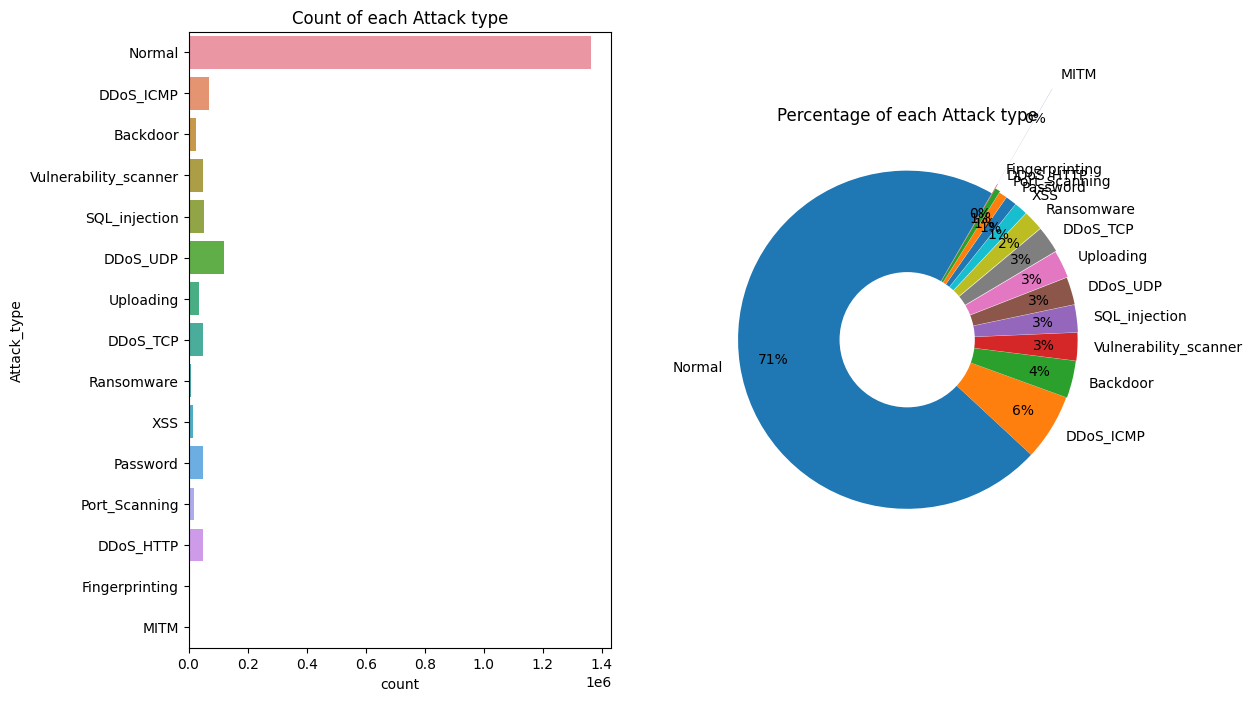

In [13]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[label_col].dropna().value_counts()))/sum(list(df[label_col].dropna().value_counts())))[::-1])[:]
labels = list(df[label_col].dropna().unique())[:]
sizes = df[label_col].value_counts()[:]

ax2.pie(sizes,  explode=explode, startangle=60, labels=labels, autopct='%1.0f%%', pctdistance=0.8)
ax2.add_artist(plt.Circle((0,0),0.4,fc='white'))
sns.countplot(y=label_col, data=df, ax=ax1)
ax1.set_title("Count of each Attack type")
ax2.set_title("Percentage of each Attack type")
plt.show()

In [14]:
X = df.drop([label_col], axis=1)
y = df[label_col]

In [15]:
# Set a target number that works for all classes
min_samples_per_class = 10000  # You can adjust this number

# Create balanced dataset
balanced_dfs = []

for class_name in y.unique():
    # Get all samples for current class
    class_data = X[y == class_name]
    
    if len(class_data) >= min_samples_per_class:
        # Downsample majority classes
        balanced_class = class_data.sample(n=min_samples_per_class, random_state=42)
    else:
        # Upsample minority classes
        balanced_class = class_data.sample(n=min_samples_per_class, replace=True, random_state=42)
    
    balanced_dfs.append(balanced_class)

# Combine all balanced classes
X_balanced = pd.concat(balanced_dfs)
y_balanced = pd.Series([class_name] * min_samples_per_class for class_name in y.unique()).explode()

# Verify the new distribution
print("\nBalanced class distribution:")
print(y_balanced.value_counts())


Balanced class distribution:
Normal                   10000
DDoS_ICMP                10000
Backdoor                 10000
Vulnerability_scanner    10000
SQL_injection            10000
DDoS_UDP                 10000
Uploading                10000
DDoS_TCP                 10000
Ransomware               10000
XSS                      10000
Password                 10000
Port_Scanning            10000
DDoS_HTTP                10000
Fingerprinting           10000
MITM                     10000
Name: count, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [17]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [18]:
label_encoder.classes_

array(['Backdoor', 'DDoS_HTTP', 'DDoS_ICMP', 'DDoS_TCP', 'DDoS_UDP',
       'Fingerprinting', 'MITM', 'Normal', 'Password', 'Port_Scanning',
       'Ransomware', 'SQL_injection', 'Uploading',
       'Vulnerability_scanner', 'XSS'], dtype=object)

In [19]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [21]:
print(X_train.shape)
print(X_test.shape)

(1527736, 96, 1)
(381935, 96, 1)


In [22]:
input_shape = X_train.shape[1:]

In [23]:
print(X_train.shape, X_test.shape)
print(input_shape)

(1527736, 96, 1) (381935, 96, 1)
(96, 1)


In [24]:
num_classes = len(np.unique(y_train))
num_classes

15

In [25]:
from  tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

2025-04-19 11:08:24.526865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745060904.726746      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745060904.790628      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [26]:
print(y_train.shape, y_test.shape)

(1527736, 15) (381935, 15)


In [27]:
# Reshape for traditional ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# If y is one-hot encoded, convert it to class labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

dt_model = DecisionTreeClassifier(random_state=42)
svc_model = SVC(probability=True)

In [32]:
model = dt_model  
model.fit(X_train_flat, y_train_labels)

# Predict
y_hat = model.predict(X_test_flat)



In [33]:
model2 = LinearSVC(max_iter=10000)
model2.fit(X_train_flat, y_train_labels)
y_hat2 = model2.predict(X_test_flat)

In [35]:
y_true = np.argmax(y_test, axis=1)

### model 1 results

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision: ", precision_score(y_real, y_pred, average='weighted'))
    print("Recall: ", recall_score(y_real, y_pred, average='weighted'))
    print("F1-score: ", f1_score(y_real, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_real, y_pred))
    print("\nClassification Report:\n", classification_report(y_real, y_pred, target_names=label_encoder.classes_))
    print("-" * 50)

# Call the function for both sets of predictions
print_score(y_hat, y_true, label_encoder)

Accuracy:  0.958655268566641
Precision:  0.9587946238208833
Recall:  0.958655268566641
F1-score:  0.9587052250843111
Confusion Matrix:
 [[  4636      0      0     51      0     11      0      0      0     23
      84      0      0      0      0]
 [     0   8241      0      0      0      0      0      0      0      0
       0      0      0    515    953]
 [     0      0  13587      0      0      1      0      0      0      0
       0      0      0      0      0]
 [    53      0      0   8596      0     12      0      0      0   1313
      38      0      0      0      0]
 [     0      0      0      0  24314      0      0      0      0      0
       0      0      0      0      0]
 [    16      0      4     17      0    114      0      0      0      9
      11      0      0      0      0]
 [     0      0      0      0      0      0     72      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0 272800      0      0
       0      0      0

In [37]:
print_score(y_hat2, y_true, label_encoder)

Accuracy:  0.9353973843716863
Precision:  0.9302529913991431
Recall:  0.9353973843716863
F1-score:  0.9277765442841458
Confusion Matrix:
 [[  4537      0      0    266      1      0      0      0      0      0
       1      0      0      0      0]
 [     0   9003      0      0      0      0      0      0      0      0
       0      0      0    141    565]
 [     0      0  13579      0      9      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0  10011      0      0      0      0      0      1
       0      0      0      0      0]
 [     0      0     22      0  24292      0      0      0      0      0
       0      0      0      0      0]
 [     0      0    112     56      3      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0     72      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0      0      0 272800      0      0
       0      0     

## Selecting the Decision tree model based upon the metrics and results

In [38]:
print(y_hat.shape)
print(type(y_hat))
print(y_test.shape)
print(type(y_test))

(381935,)
<class 'numpy.ndarray'>
(381935, 15)
<class 'numpy.ndarray'>


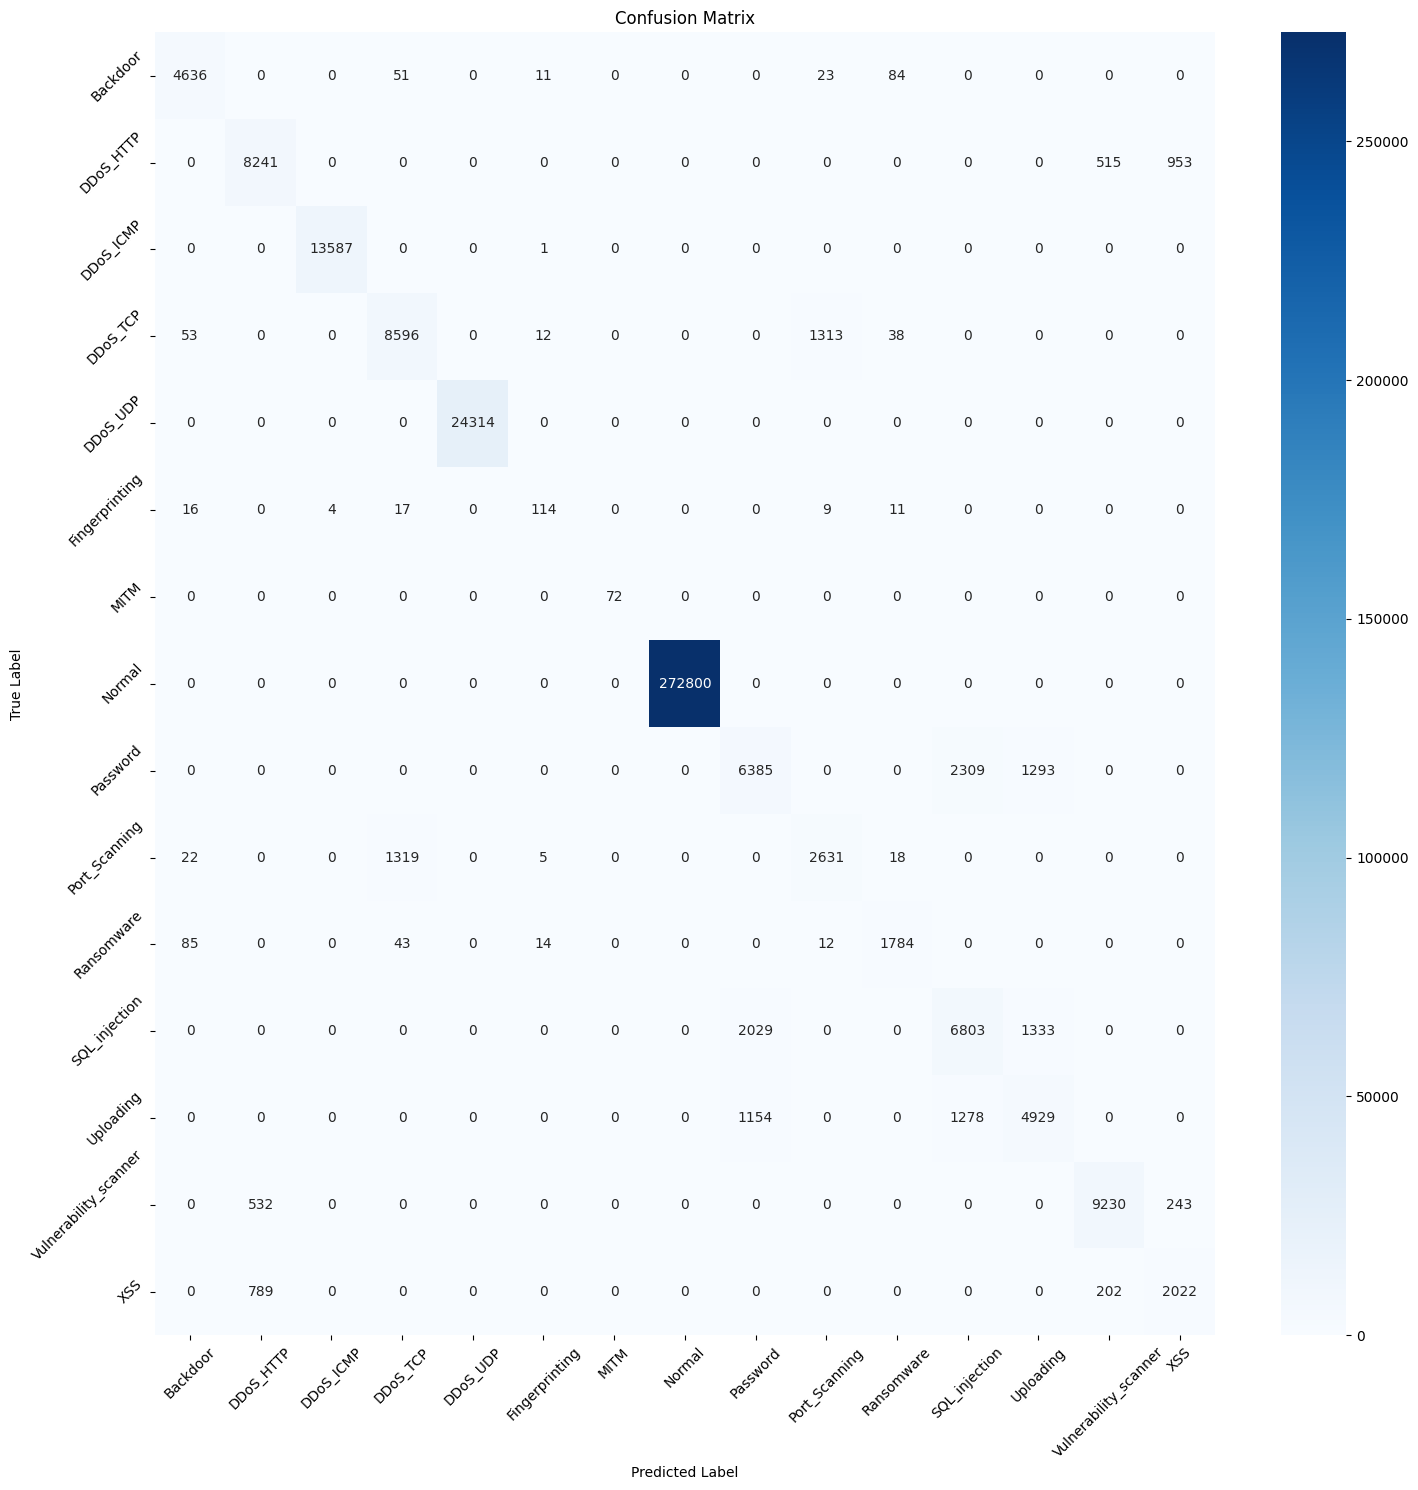


Classification Report:
                       precision    recall  f1-score   support

             Backdoor     0.9634    0.9648    0.9641      4805
            DDoS_HTTP     0.8618    0.8488    0.8553      9709
            DDoS_ICMP     0.9997    0.9999    0.9998     13588
             DDoS_TCP     0.8574    0.8586    0.8580     10012
             DDoS_UDP     1.0000    1.0000    1.0000     24314
       Fingerprinting     0.7261    0.6667    0.6951       171
                 MITM     1.0000    1.0000    1.0000        72
               Normal     1.0000    1.0000    1.0000    272800
             Password     0.6673    0.6393    0.6530      9987
        Port_Scanning     0.6597    0.6586    0.6592      3995
           Ransomware     0.9220    0.9205    0.9212      1938
        SQL_injection     0.6548    0.6693    0.6619     10165
            Uploading     0.6524    0.6696    0.6609      7361
Vulnerability_scanner     0.9279    0.9225    0.9252     10005
                  XSS     0.62

In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_pred and y_test are one-hot encoded, convert them to class labels

y_test_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test_classes, y_hat)

# Plot confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm, 
            annot=True,  
            fmt='d',  # Removed the extra misplaced 'y' here
            cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, 
                            y_hat, 
                            target_names=label_encoder.classes_,
                            digits=4))


# Part B : poisoning strategy

Evaluating Original Model on Clean Data
Original Model - Accuracy: 0.9587

Evaluating Model on 5% Flipped Labels
Flip 5% - Accuracy: 0.9109

Evaluating Model on 10% Flipped Labels
Flip 10% - Accuracy: 0.8632

Evaluating Model on 15% Flipped Labels
Flip 15% - Accuracy: 0.8156

Evaluating Model on 20% Flipped Labels
Flip 20% - Accuracy: 0.7675


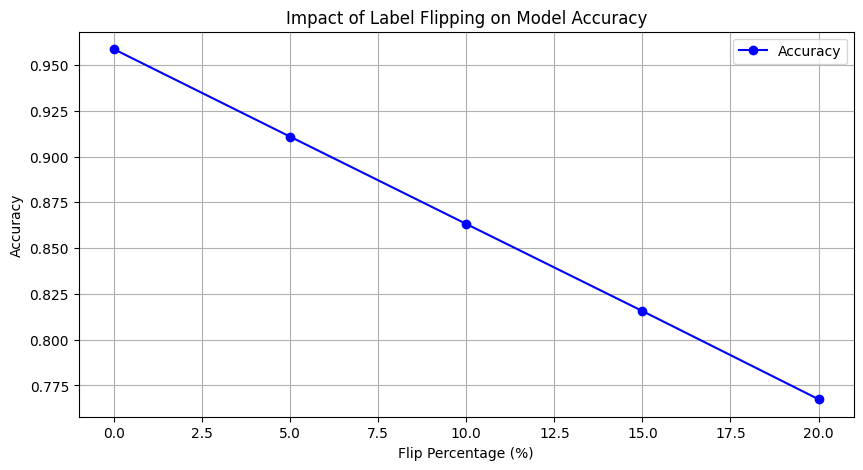

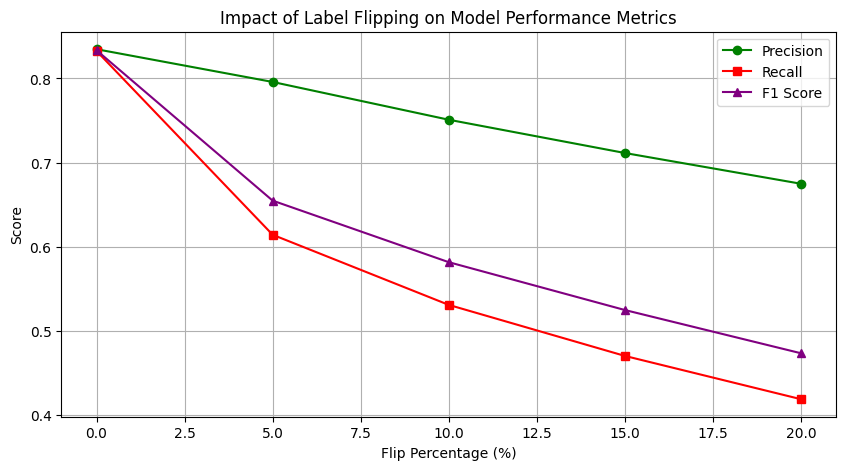

In [43]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# === Function to flip labels ===
def flip_labels(y_data, flip_percentage):
    """Randomly flips a percentage of labels in y_data (class labels format)"""
    y_data_flipped = y_data.copy()
    n_samples = len(y_data)
    n_flip = int(n_samples * flip_percentage)
    flip_indices = np.random.choice(n_samples, n_flip, replace=False)

    for idx in flip_indices:
        current_label = y_data_flipped[idx]
        possible_labels = [i for i in range(np.max(y_data) + 1) if i != current_label]
        new_label = np.random.choice(possible_labels)
        y_data_flipped[idx] = new_label

    return y_data_flipped

# === Initialize tracking ===
flip_percentages = [0.05, 0.10, 0.15, 0.20]
performance = {"flip_percentage": [], "accuracy": [], "precision": [], "recall": [], "f1_score": []}

# === Convert y_test from one-hot to class labels ===
y_true_labels = np.argmax(y_test, axis=1)

# === Evaluate on clean data ===
print("Evaluating Original Model on Clean Data")
y_pred = model.predict(X_test_flat)
report = classification_report(y_true_labels, y_pred, output_dict=True)

performance["flip_percentage"].append(0)
performance["accuracy"].append(report["accuracy"])
performance["precision"].append(report["macro avg"]["precision"])
performance["recall"].append(report["macro avg"]["recall"])
performance["f1_score"].append(report["macro avg"]["f1-score"])

print(f'Original Model - Accuracy: {report["accuracy"]:.4f}')

# === Evaluate with flipped labels ===
for flip_percentage in flip_percentages:
    print(f"\nEvaluating Model on {flip_percentage * 100:.0f}% Flipped Labels")

    y_test_flipped = flip_labels(y_true_labels, flip_percentage)
    report = classification_report(y_test_flipped, y_pred, output_dict=True)

    performance["flip_percentage"].append(flip_percentage * 100)
    performance["accuracy"].append(report["accuracy"])
    performance["precision"].append(report["macro avg"]["precision"])
    performance["recall"].append(report["macro avg"]["recall"])
    performance["f1_score"].append(report["macro avg"]["f1-score"])

    print(f'Flip {flip_percentage * 100:.0f}% - Accuracy: {report["accuracy"]:.4f}')

# === Plot Accuracy ===
plt.figure(figsize=(10, 5))
plt.plot(performance["flip_percentage"], performance["accuracy"], marker='o', label='Accuracy', color='blue')
plt.xlabel("Flip Percentage (%)")
plt.ylabel("Accuracy")
plt.title("Impact of Label Flipping on Model Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# === Plot Precision, Recall, F1 ===
plt.figure(figsize=(10, 5))
plt.plot(performance["flip_percentage"], performance["precision"], marker='o', label='Precision', color='green')
plt.plot(performance["flip_percentage"], performance["recall"], marker='s', label='Recall', color='red')
plt.plot(performance["flip_percentage"], performance["f1_score"], marker='^', label='F1 Score', color='purple')
plt.xlabel("Flip Percentage (%)")
plt.ylabel("Score")
plt.title("Impact of Label Flipping on Model Performance Metrics")
plt.grid(True)
plt.legend()
plt.show()


<!-- import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Function to flip labels
def flip_labels(y_train, flip_percentage):
    n_samples = len(y_train)
    n_flip = int(n_samples * flip_percentage)
    flip_indices = np.random.choice(n_samples, n_flip, replace=False)
    y_train_flipped = y_train.copy()
    
    for idx in flip_indices:
        current_label = np.argmax(y_train_flipped[idx])
        new_label = np.random.choice([i for i in range(y_train_flipped.shape[1]) if i != current_label])
        y_train_flipped[idx] = to_categorical(new_label, num_classes=y_train_flipped.shape[1])
    
    return y_train_flipped

# Flip percentages
flip_percentages = [0.05, 0.10, 0.15, 0.20]
performance = {"flip_percentage": [], "accuracy": [], "precision": [], "recall": [], "f1_score": []}

# Training and Evaluation
for flip_percentage in flip_percentages:
    y_train_flipped = flip_labels(y_train, flip_percentage)

    # Train model with flipped labels
    model.fit(X_train, y_train_flipped, epochs=2, batch_size=32, validation_split=0.2, verbose=1)

    # Evaluate model
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    # Compute classification metrics
    report = classification_report(y_true_labels, y_pred_labels, output_dict=True)
    
    performance["flip_percentage"].append(flip_percentage * 100)
    performance["accuracy"].append(report["accuracy"])
    performance["precision"].append(report["macro avg"]["precision"])
    performance["recall"].append(report["macro avg"]["recall"])
    performance["f1_score"].append(report["macro avg"]["f1-score"])

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(performance["flip_percentage"], performance["accuracy"], marker='o', label='Accuracy', color='blue')
plt.xlabel("Flip Percentage (%)")
plt.ylabel("Accuracy")
plt.title("Impact of Label Flipping on Model Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# Plot Precision, Recall, F1-score
plt.figure(figsize=(10, 5))
plt.plot(performance["flip_percentage"], performance["precision"], marker='o', label='Precision', color='green')
plt.plot(performance["flip_percentage"], performance["recall"], marker='s', label='Recall', color='red')
plt.plot(performance["flip_percentage"], performance["f1_score"], marker='^', label='F1 Score', color='purple')
plt.xlabel("Flip Percentage (%)")
plt.ylabel("Score")
plt.title("Impact of Label Flipping on Model Performance Metrics")
plt.grid(True)
plt.legend()
plt.show()
 -->